# Grade Distributions and Data Analytics with Bard and ChatGPT4 
* This small project was made in conjunction with Sam Dixon's idea and some copiloted assistance from Bard and ChatGPT4's large language models

## Directory
- [Preqs](#Prerequisite)
    - Run this cell to get the required python dependencies
- [Parse Data](#Scrape)
    - Dynamically scrape the data from annex.us utilizing beautiful soup and selenium
- [Analysis](#Analysis)
    - Analysis includes looks at mean for all course history
    - Professor with the max GPA
    - Professor with the max number of Q-drops
    - Professor with the max number of A's
   

## Prerequisite
- Run the cell below to ensure you have the required python packages for data agregation and analysis

In [ ]:
!pip install requests
!pip install BeautifulSoup
!pip install selenium
!pip install pandas

## Scrape

In [78]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

# getting the course number and college deptartment tag
dept = input("Enter the college dept (ex. ECEN): ")
number = input("Please enter the course number (ex. 248): ")

# some basic error checking
try: 
    cn = int(cn)
except:
    print("Looks like you entered a non-numeric course number, please enter a numeric number and try again")
    cn = input("Re-enter the course number (ex. 303): ")
    
# Initialize the selenium driver to actively parse the data
driver = webdriver.Chrome()

# Go to the website
driver.get(f'https://anex.us/grades/?dept={dept}&number={number}')

# Wait for the data to load
driver.implicitly_wait(10)

# Find the table containing the grade data
table = driver.find_element(by="id", value="tableDiv")
html = table.get_attribute("innerHTML")
df = pd.read_html(html)[0]

# Close the driver
driver.close()


Enter the college dept (ex. ECEN): CSCE
Please enter the course number (ex. 248): 221


## Analysis

Text(0.5, 1.0, 'Mean number of Q-drops by year vs. Year')

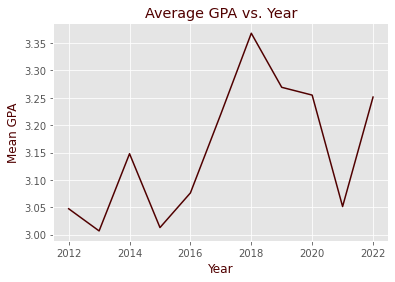

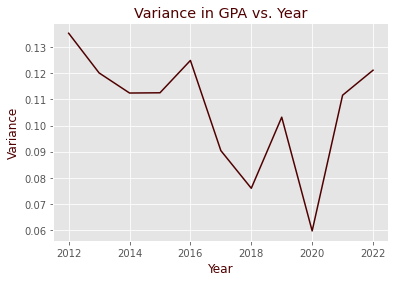

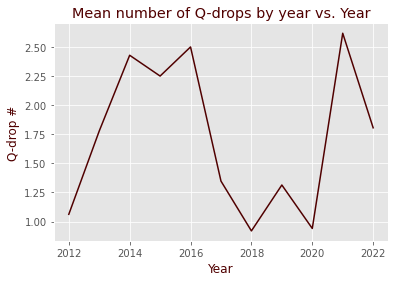

In [80]:
import matplotlib.pyplot as plt

maroon='#500000'
plt.style.use("ggplot")
year = df.groupby('Year')
mean_year = year['GPA'].mean()
var_year = year['GPA'].var()
q_year = year['Q'].mean()

plt.figure(1)
plt.plot(mean_year, c=maroon)
plt.xlabel('Year', c=maroon)
plt.ylabel('Mean GPA', c=maroon)
plt.title('Average GPA vs. Year', c=maroon)

plt.figure(2)
plt.plot(var_year, c=maroon)
plt.xlabel('Year', c=maroon)
plt.ylabel('Variance', c=maroon)
plt.title('Variance in GPA vs. Year', c=maroon)

plt.figure(3)
plt.plot(q_year, c=maroon)
plt.xlabel('Year', c=maroon)
plt.ylabel('Q-drop #', c=maroon)
plt.title('Mean number of Q-drops by year vs. Year', c=maroon)

# Conclusion

 - Grade distributions are important
     - provide valuable feedback to education systems
     
 
 - Data Analysis can be performed 
     - data is accessible/public
     - demand for insight exists